In [7]:
import sys
import os
import math
import numpy as np
import pandas as pd
from scipy.sparse.linalg import eigs
import scipy.io
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.utils import graph_shortest_path
import seaborn as sb

In [2]:
path = "./data/isomap.mat"

faces = scipy.io.loadmat(path)
faces = faces['images']
#print(faces.T.shape)
faces = faces.T
#print(faces)
m, d = faces.shape
faces

array([[0.01617647, 0.01617647, 0.01617647, ..., 0.        , 0.        ,
        0.        ],
       [0.01617647, 0.01617647, 0.01617647, ..., 0.        , 0.        ,
        0.        ],
       [0.01617647, 0.01617647, 0.01617647, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01617647, 0.01617647, 0.01617647, ..., 0.        , 0.        ,
        0.        ],
       [0.01617647, 0.01617647, 0.01617647, ..., 0.        , 0.        ,
        0.        ],
       [0.01617647, 0.01617647, 0.01617647, ..., 0.        , 0.        ,
        0.        ]])

In [34]:
# Build weighted graph aka neighbors matrix 

A = np.zeros((m, m))
eps = 6.75
eps = 200 # for 1-norm

for i in range(m):
    for j in range(m):
        # use the line below if using the 1-norm distance
        dist = np.linalg.norm(faces[i, :] - faces[j, :], ord=1)
        # L2 norm
        #dist = np.linalg.norm(faces[i, :] - faces[j, :])
        if dist <= eps: A[i, j] = dist


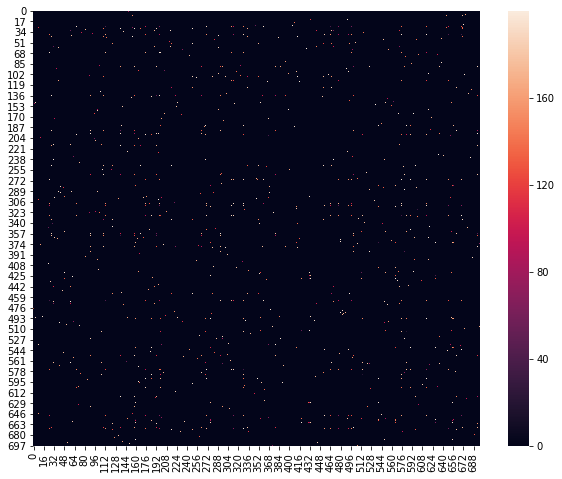

In [35]:
plt.figure(figsize = (10,8))
sb.heatmap(A)

In [36]:
# counting the number/percentage of non-zero elements for tuning epsilon
print(np.count_nonzero(A))
print(100*np.count_nonzero(A)/(m*m))

2308
147.98794082868196
0.4737235326475152


In [37]:
# writing matrix to visualize in Gephi

graph = nx.Graph(A)
nx.write_gexf(graph, 'graph_L1_200.gexf')

(698, 2)


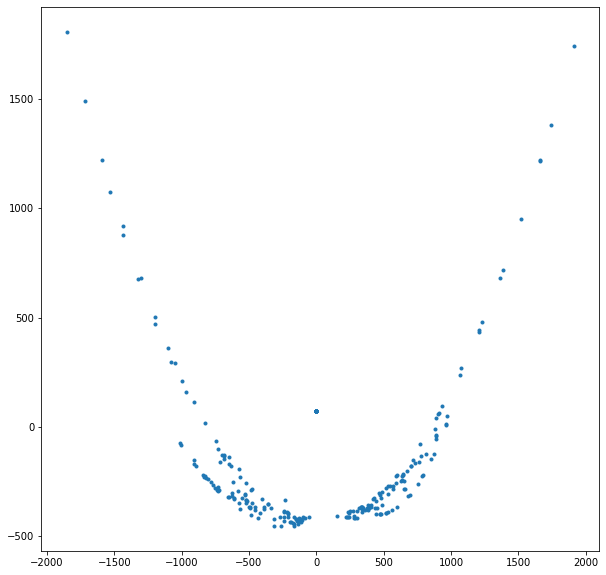

In [38]:
# compute pairwise shortest distance matrix
D = graph_shortest_path.graph_shortest_path(A)

# generate centering matrix 
H = np.identity(m) - ((1/m)*np.ones((m, m)))
#print(H)

# compute pairwise travel dist (deodesic) of data through data cloud
C = -1/2 * np.dot(H, np.dot(np.square(D), H))
#C = -1/2 * np.asmatrix(H) @ np.asmatrix(np.square(D)) @ np.asmatrix(H)
#print(C)

# eigendecomposition of C matrix 
k = 2
#e_vals, w = eigs(C, k)
e_vals, w = np.linalg.eig(C)
e_vals = e_vals.real
w = w.real
sorted_e_vals = np.argsort(e_vals)
w = w.real
w = w[:, sorted_e_vals[-k:]]
e_vals = e_vals[sorted_e_vals[-k:]]

# new representation
Z = np.dot(w, np.diag(np.sqrt(e_vals)))
print(Z.shape)

plt.figure(figsize=(10, 10))
plt.scatter(Z[:,1], Z[:, 0], marker=".")

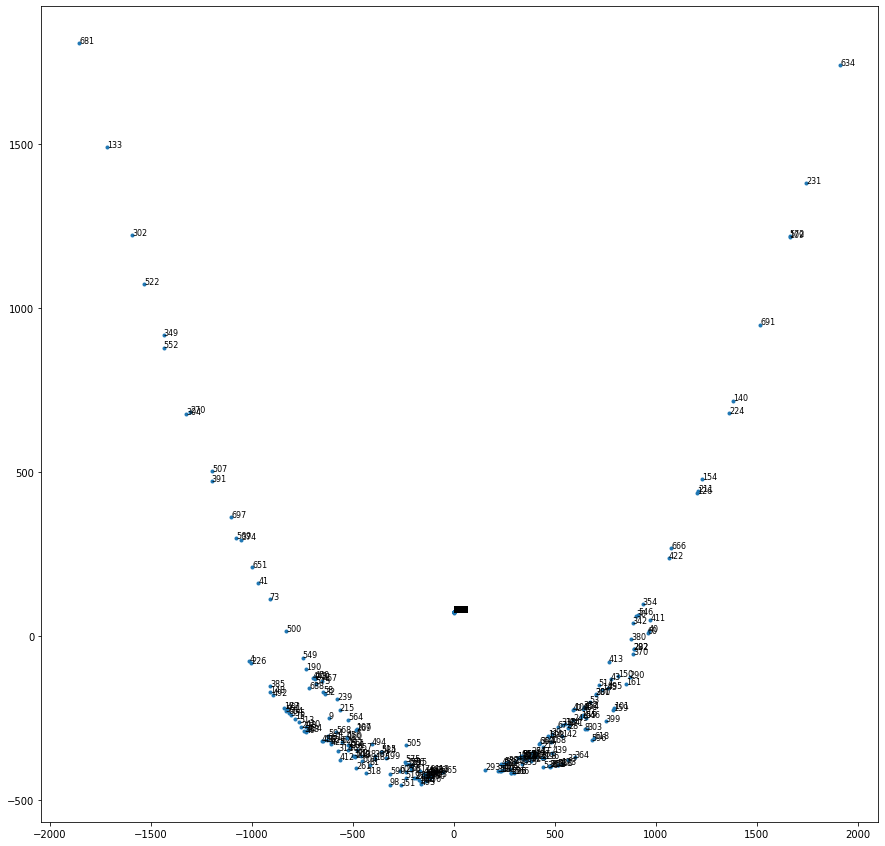

In [54]:
plt.figure(figsize=(15,15))
plt.scatter(Z[:,1], Z[:, 0], marker=".")
for i in range(m):
    label = f'{i}'
    plt.annotate(label, (Z[:,1][i], Z[:,0][i]), fontsize=8)

plt.show()

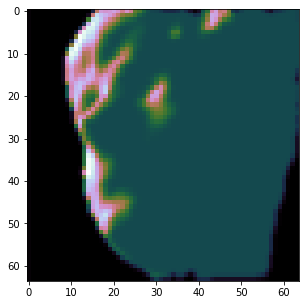

In [52]:
# for visualizing faces using data point index

face_img = faces[199,:].reshape((int(math.sqrt(d)), int(math.sqrt(d)))).T
plt.figure(figsize=(5, 5))
plt.imshow(face_img, cmap='cubehelix')

(698, 2)
(2, 4096)


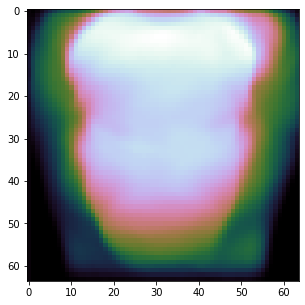

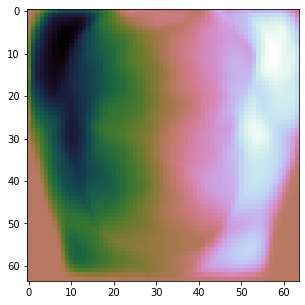

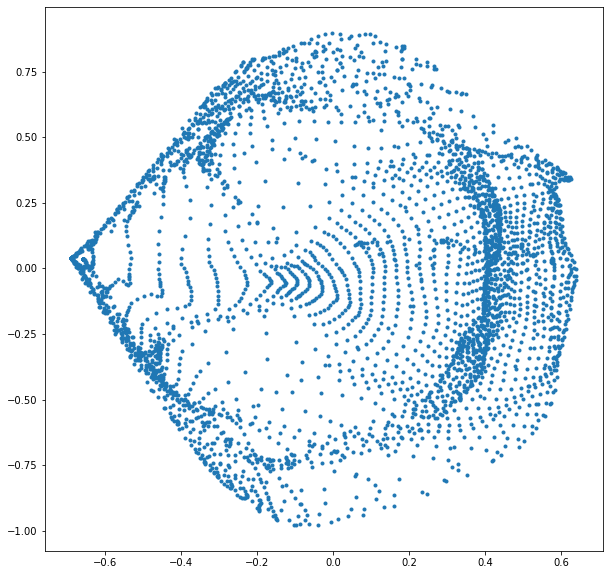

In [68]:
# This code is copied from question 2 to perform PCA

avg = np.mean(faces, axis=1)

faces_minus_avg = faces - avg[:,None]

# compute covarirance matrix 
C = np.dot(faces_minus_avg, faces_minus_avg.T) / m

k = 2
e_vals_pca, w_pca = eigs(C, k) # using scipy this HW because optional param k 
e_vals_pca = e_vals_pca.real
w_pca = w_pca.real
print(w_pca.shape)

z = [] 
for i in range(k):
    
    z_i = np.dot(w_pca[:, i].T, faces_minus_avg) / math.sqrt(e_vals_pca[i]) 
    z.append(z_i)
    z_vis = z_i.reshape((int(math.sqrt(d)), int(math.sqrt(d))))
    plt.figure(figsize=(5, 5))
    plt.imshow(z_vis.T, cmap='cubehelix')
    
z = np.asarray(z)
plt.figure(figsize=(10, 10))
plt.scatter(z[0,:], z[1, :], marker=".")
print(z.shape)